<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220510.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표 
* pandas functions
* regression 
* timestamp
* one-hot encoding

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from datetime import datetime, date, time, timedelta, timezone

# pandas functions

In [3]:
list_file = [f'players_{a:02}.csv' for a in range(15, 22)]
d1 = pd.concat(map(pd.read_csv, list_file))
d1.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,36+3,40+3,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3


In [4]:
top_nans = pd.DataFrame({'nans' : d1.isnull().sum()[d1.isnull().sum() != 0]}).nlargest(3, 'nans')
top_nans

,nans
loaned_from,115638
nation_position,115156
nation_jersey_number,115156


In [5]:
d1[top_nans.index].fillna(d1.mode().iloc[0,0]).head()

,loaned_from,nation_position,nation_jersey_number
0,41.0,CF,10.0
1,41.0,LW,7.0
2,41.0,RS,11.0
3,41.0,ST,10.0
4,41.0,GK,1.0


In [8]:
d2 = pd.read_csv('pivot.csv', parse_dates = ['month'], dtype = {'state':'category'})
d2.head()

,month,state,permit
0,2020-04-30,Alabama,21276.0
1,2020-04-30,Alaska,85.0
2,2020-04-30,California,24460.0
3,2020-04-30,Massachusetts,5074.0
4,2020-04-30,North Dakota,280.0


In [9]:
s1 = pd.pivot_table(d2, index = 'state', columns = 'month', values = 'permit')
s1

month,2020-01-31,2020-02-29,2020-03-31,2020-04-30
state,,,,
Alabama,37140.0,29633.0,31205.0,21276.0
Alaska,223.0,139.0,143.0,85.0
California,34694.0,32002.0,27792.0,24460.0
Massachusetts,9289.0,9173.0,NaN,5074.0
North Dakota,370.0,396.0,587.0,280.0


In [11]:
s1.columns = s1.columns.astype('str')
s1 = s1.reset_index()
s1

month,state,2020-01-31,2020-02-29,2020-03-31,2020-04-30
0,Alabama,37140.0,29633.0,31205.0,21276.0
1,Alaska,223.0,139.0,143.0,85.0
2,California,34694.0,32002.0,27792.0,24460.0
3,Massachusetts,9289.0,9173.0,NaN,5074.0
4,North Dakota,370.0,396.0,587.0,280.0


In [12]:
s1.columns.name = None 
s1

,state,2020-01-31,2020-02-29,2020-03-31,2020-04-30
0,Alabama,37140.0,29633.0,31205.0,21276.0
1,Alaska,223.0,139.0,143.0,85.0
2,California,34694.0,32002.0,27792.0,24460.0
3,Massachusetts,9289.0,9173.0,NaN,5074.0
4,North Dakota,370.0,396.0,587.0,280.0


In [13]:
s2 = pd.melt(s1, id_vars = 'state', var_name = 'month', value_name = 'permit')
s2 = s2[d2.columns]
s2.month = s2.month.to_numpy().astype('datetime64[D]')
s2.head()

,month,state,permit
0,2020-01-31,Alabama,37140.0
1,2020-01-31,Alaska,223.0
2,2020-01-31,California,34694.0
3,2020-01-31,Massachusetts,9289.0
4,2020-01-31,North Dakota,370.0


# regression

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestRegresser, RandomForestClassifer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  
import sklearn.datasets as skd
import matplotlib.pyplot as plt

In [20]:
a1 = pd.read_csv('heights.csv')
a2 = pd.read_csv('manhattan.csv')

In [21]:
x = a1.height.values.reshape(-1, 1)
y = a1.weight

In [23]:
fit_lm = LinearRegression().fit(x, y)

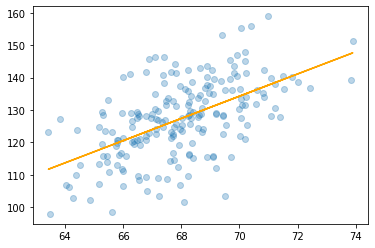

In [24]:
plt.plot(x, y, 'o', alpha = .3)
plt.plot(x, fit_lm.predict(x), color = 'orange')

In [25]:
a2.columns

Index(['rental_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood', 'borough'],
      dtype='object')

In [26]:
x = a2[['bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman']]
y = a2['rent']

In [27]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [28]:
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)
pred_rf = fit_rf.predict(x_te)

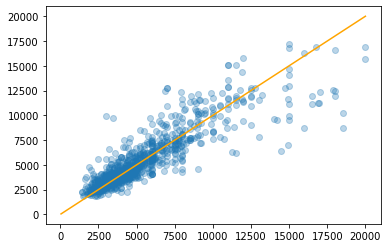

In [30]:
plt.plot(y_te, pred_rf, 'o', alpha = .3)
plt.plot([50,20000], [50,20000], color = 'orange')

In [31]:
raw = skd.load_diabetes()
[a for a, b in raw.items()]

['data',
 'target',
 'frame',
 'DESCR',
 'feature_names',
 'data_filename',
 'target_filename',
 'data_module']

In [191]:
x = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = raw['target']
x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


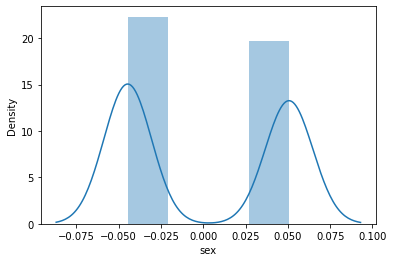

In [192]:
sns.distplot(x['sex'])

In [193]:
x.groupby('sex')['sex'].count()

sex
-0.044642    235
 0.050680    207
Name: sex, dtype: int64

In [194]:
x['sex'] = x['sex'].apply(lambda x : np.where(x > 0, 1, 0))
x['sex'] = x['sex'].astype('category')
x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,1,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,0,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,1,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,0,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,0,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


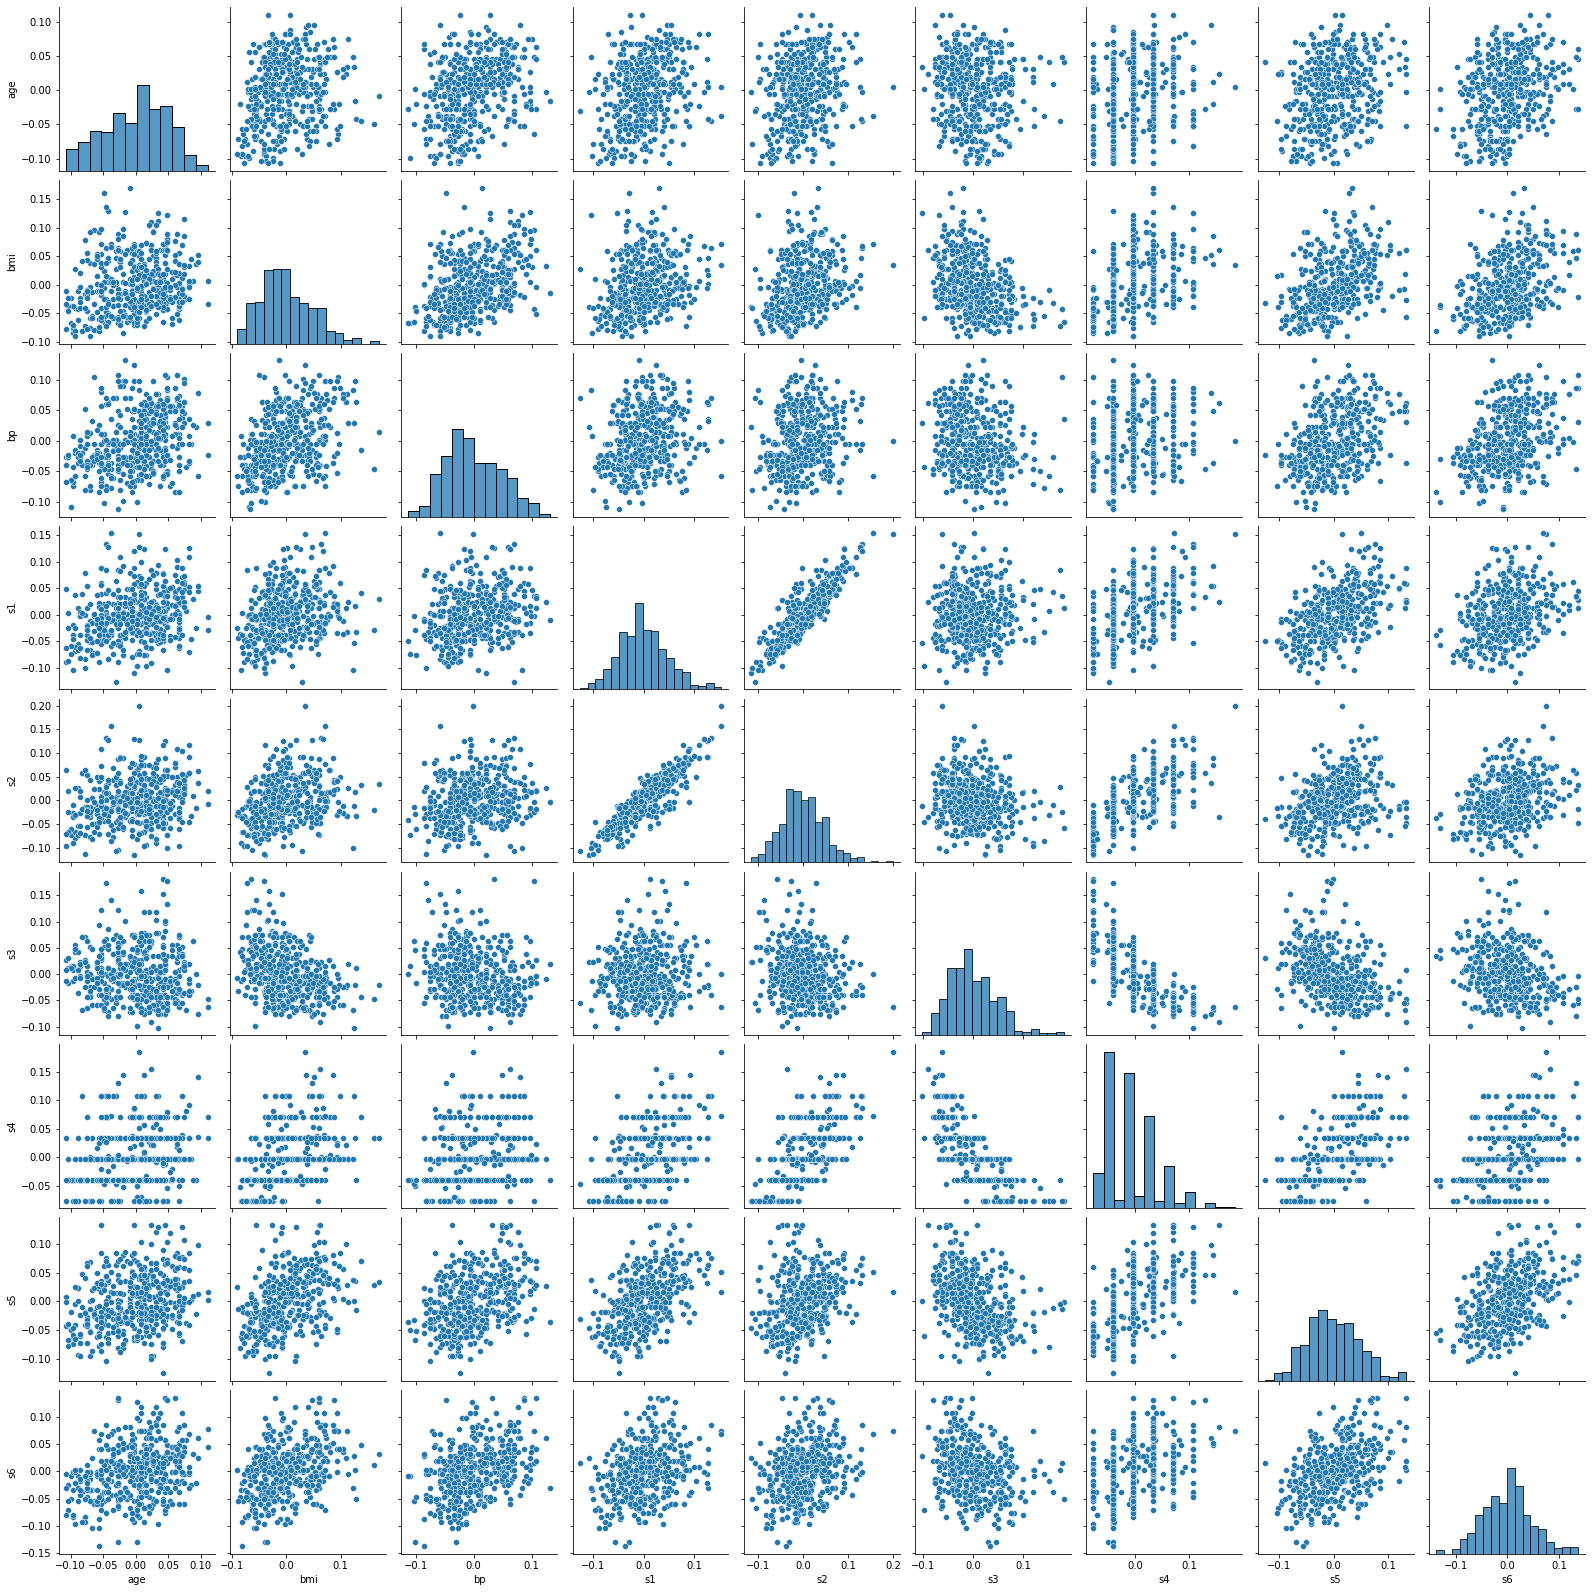

In [195]:
sns.pairplot(x)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


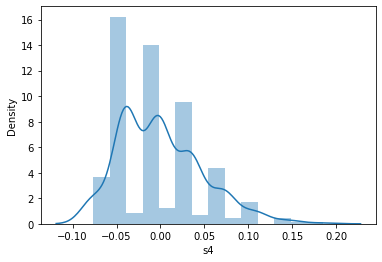

In [196]:
sns.distplot(x['s4'])

In [198]:
x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,1,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,0,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,1,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,0,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,0,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [201]:
x = pd.get_dummies(x, columns = ['sex'], prefix = 'sex')

In [202]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .3)

In [204]:
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)
pred_rf = fit_rf.predict(x_te)

In [206]:
fit_rf.score(x_te, y_te)

0.3595955000013139

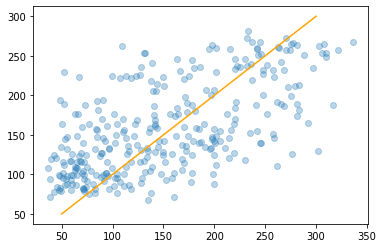

In [209]:
plt.plot(y_te, pred_rf, 'o', alpha = .3)
plt.plot([50,300], [50,300], color = 'orange')

# timestamp

In [49]:
import os

In [60]:
list_file = pd.DataFrame({'file':os.listdir()}).assign(flag = lambda x : x['file'].str.contains('^aapl'))
b1 = pd.read_csv(list_file[list_file['flag'] == True].iloc[1,0], usecols= ['Close'])
b1.head()

,Close
0,153.18
1,155.45
2,153.93
3,154.45
4,155.37


In [62]:
range1 = pd.date_range('2021-06-01', '2021-06-30', freq=  'B')

In [63]:
b1.set_index(range1, inplace = True)
b1.head()

,Close
2021-06-01,153.18
2021-06-02,155.45
2021-06-03,153.93
2021-06-04,154.45
2021-06-07,155.37


In [66]:
b2 = b1.asfreq('H', method = 'pad')
b2.head()

,Close
2021-06-01 00:00:00,153.18
2021-06-01 01:00:00,153.18
2021-06-01 02:00:00,153.18
2021-06-01 03:00:00,153.18
2021-06-01 04:00:00,153.18


In [67]:
b2.tz_localize('asia/seoul').head()

,Close
2021-06-01 00:00:00+09:00,153.18
2021-06-01 01:00:00+09:00,153.18
2021-06-01 02:00:00+09:00,153.18
2021-06-01 03:00:00+09:00,153.18
2021-06-01 04:00:00+09:00,153.18


# one-hot encoding

In [69]:
d5=  sns.load_dataset('titanic')
d5.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [70]:
d5['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [73]:
pd.get_dummies(d5['embarked'], prefix = 'embarked')

,embarked_C,embarked_Q,embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [75]:
pd.get_dummies(d5, columns = ['embarked'], prefix = 'embarked').head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,embarked_C,embarked_Q,embarked_S
0,0,3,male,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,0,0,1
1,1,1,female,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,1,0,0
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,0,0,1
3,1,1,female,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,0,0,1
4,0,3,male,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,0,0,1


In [76]:
e_list = list('SCQ')
e_list

['S', 'C', 'Q']

In [79]:
for e in e_list : 
  d5['embarked' + f'{e}'] = d5['embarked'] == e
d5.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,embarkedS,embarkedC,embarkedQ
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,True,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,True,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,True,False,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True,False,False


In [81]:
from sklearn.preprocessing import OneHotEncoder

In [141]:
oh = OneHotEncoder(sparse = False)
t1 = sns.load_dataset('titanic')

In [142]:
t1.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [143]:
t1['age'] = t1['age'].fillna(t1['age'].mean()).astype('int')
t1.drop('deck', inplace = True, axis = 1)

In [144]:
t1['embark_town'] = t1['embark_town'].fillna(t1['embark_town'].mode()[0] )
t1['embarked'] = t1['embarked'].fillna(t1['embarked'].mode()[0] )

In [145]:
t1.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [146]:
t1.value_counts()

survived  pclass  sex     age  sibsp  parch  fare     embarked  class   who    adult_male  embark_town  alive  alone
0         3       male    29   0      0      8.0500   S         Third   man    True        Southampton  no     True     13
                                             7.8958   S         Third   man    True        Southampton  no     True     13
                                             7.7500   Q         Third   man    True        Queenstown   no     True      9
1         3       female  29   0      0      7.7500   Q         Third   woman  False       Queenstown   yes    True      7
0         2       male    29   0      0      0.0000   S         Second  man    True        Southampton  no     True      6
                                                                                                                        ..
          3       male    18   1      1      7.8542   S         Third   man    True        Southampton  no     False     1
                      

In [147]:
x = t1[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town',
       'alive', 'alone']]
y = t1['survived']

In [148]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [149]:
x_tr['embarked'].value_counts()

S    458
C    116
Q     49
Name: embarked, dtype: int64

In [154]:
tr = oh.fit_transform(x_tr['embarked'].values.reshape(-1,1))
tr = tr.astype(int)
tr
oh.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [176]:
tr_oh = pd.DataFrame(tr, columns = [f'embarked_{a}' for a in oh.categories_[0]])
print(len(tr_oh), len(x_tr))

623 623


In [189]:
tr_oh.index = x_tr.index
tr_oh

,embarked_C,embarked_Q,embarked_S
263,0,0,1
25,0,0,1
113,0,0,1
623,0,0,1
403,0,0,1
...,...,...,...
29,0,0,1
434,0,0,1
859,1,0,0
526,0,0,1


In [184]:
print(tr_oh.shape, x_tr.drop(columns = ['embarked']).shape)

(623, 3) (623, 12)


In [190]:
pd.concat([x_tr.drop(columns = ['embarked']), tr_oh], axis = 1)

,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,embarked_C,embarked_Q,embarked_S
263,1,male,40,0,0,0.0000,First,man,True,Southampton,no,True,0,0,1
25,3,female,38,1,5,31.3875,Third,woman,False,Southampton,yes,False,0,0,1
113,3,female,20,1,0,9.8250,Third,woman,False,Southampton,no,False,0,0,1
623,3,male,21,0,0,7.8542,Third,man,True,Southampton,no,True,0,0,1
403,3,male,28,1,0,15.8500,Third,man,True,Southampton,no,False,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,3,male,29,0,0,7.8958,Third,man,True,Southampton,no,True,0,0,1
434,1,male,50,1,0,55.9000,First,man,True,Southampton,no,False,0,0,1
859,3,male,29,0,0,7.2292,Third,man,True,Cherbourg,no,True,1,0,0
526,2,female,50,0,0,10.5000,Second,woman,False,Southampton,yes,True,0,0,1
